# Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

import warnings
warnings.filterwarnings('ignore')

# Loading the data

In [152]:
df=pd.read_csv(r"C:\Users\61491\Desktop\Inn DS\dataframe_.csv")
df

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1692   25.410184  -76.380902
1693   29.537304  -82.796934
1694   31.633331  -87.000000
1695   29.091458 -104.943052
1696   17.145296 -101.726894

[1697 rows x 2 columns]

# Data Cleaning

## Check for duplicates

In [8]:
df.duplicated().value_counts()

False    1091
True      606
dtype: int64

In [159]:
# Drop the duplicates

df.drop_duplicates(keep='first',inplace=True)

#Reset the index
df.reset_index(inplace=True)

df.drop(['index'],axis=1,inplace=True)

df

input      output
0    -122.740667 -130.572085
1    -121.531419 -129.938929
2    -134.917019 -130.141832
3    -120.605951 -125.760932
4    -129.894781 -112.785214
...          ...         ...
1086 -119.954237  123.609122
1087 -109.942155  127.197394
1088 -111.515368  128.170885
1089 -110.344221  123.087950
1090         NaN         NaN

[1091 rows x 2 columns]

## Check for missing values

In [11]:
df.isna()
df.isna().sum()

input  output
0     False   False
1     False   False
2     False   False
3     False   False
4     False   False
...     ...     ...
1086  False   False
1087  False   False
1088  False   False
1089  False   False
1090   True    True

[1091 rows x 2 columns]

input     1
output    1
dtype: int64

## Filling the missing values

In [16]:
x=df.input.mean()
df.input.fillna(x,inplace=True)

y=df.output.mean()
df.output.fillna(y,inplace=True)

In [17]:
df.isna().sum()

input     0
output    0
dtype: int64

## Check for Corrupted Data

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1091 non-null   float64
 1   output  1091 non-null   float64
dtypes: float64(2)
memory usage: 17.2 KB


In [20]:
# no courrupted data

## Outliers

In [22]:
df.skew()

input    -0.283801
output    0.922656
dtype: float64

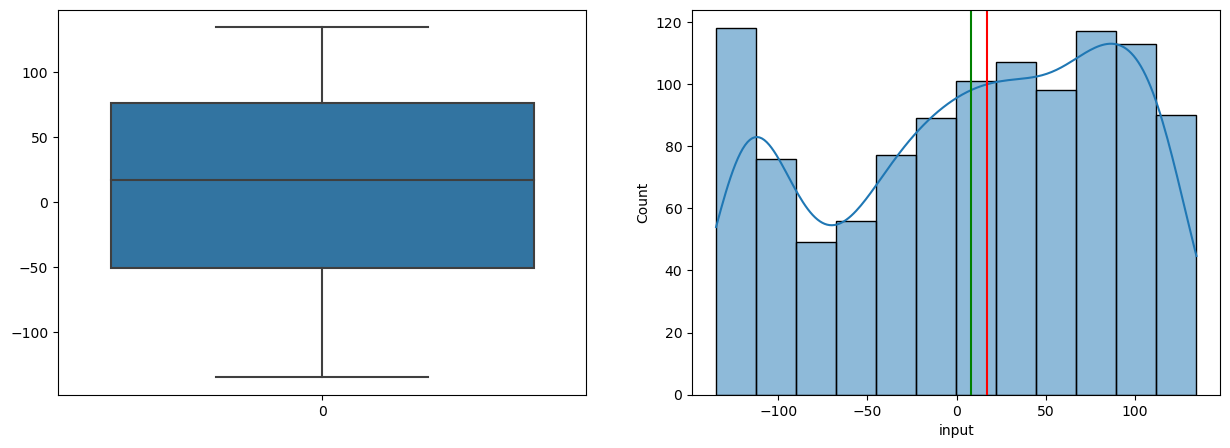

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.input)

plt.subplot(122)
sns.histplot(df.input, kde = True)
plt.axvline(df.input.mean(), color = 'green')
plt.axvline(df.input.median(), color = 'red');

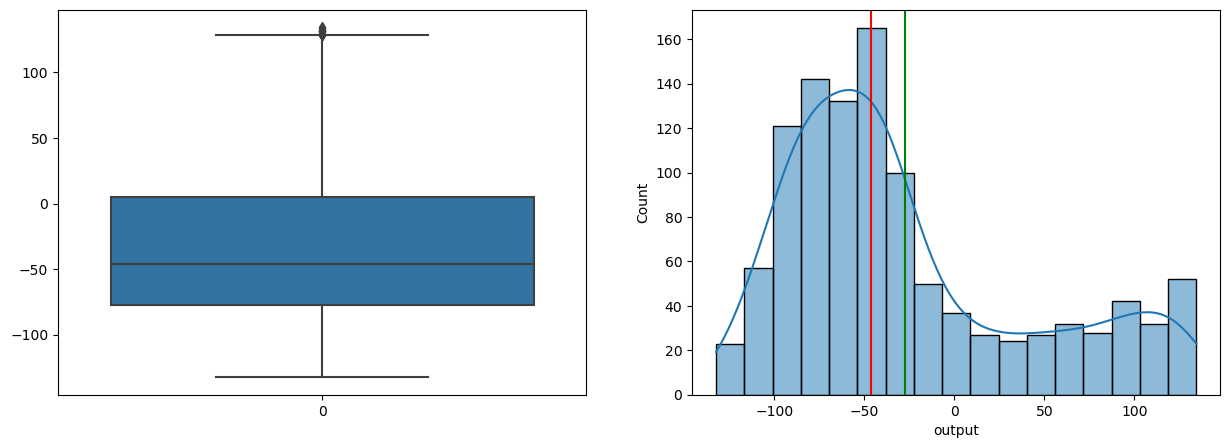

In [24]:
plt.figure(figsize=(15,5))

plt.subplot(121)
sns.boxplot(df.output)

plt.subplot(122)
sns.histplot(df.output, kde = True)
plt.axvline(df.output.mean(), color = 'green')
plt.axvline(df.output.median(), color = 'red');

# Data Visualization

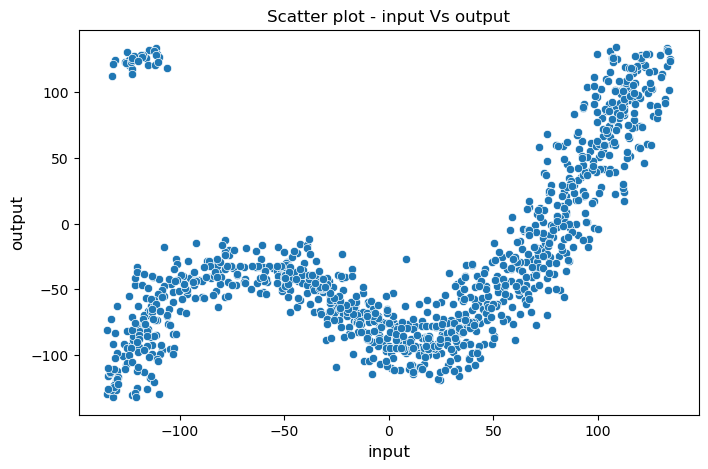

In [29]:
plt.figure(figsize=(8,5),dpi=100)
sns.scatterplot(x="input",y="output",data=df)
plt.title("Scatter plot - input Vs output")
plt.xlabel("input",fontsize=12)
plt.ylabel("output",fontsize=12);

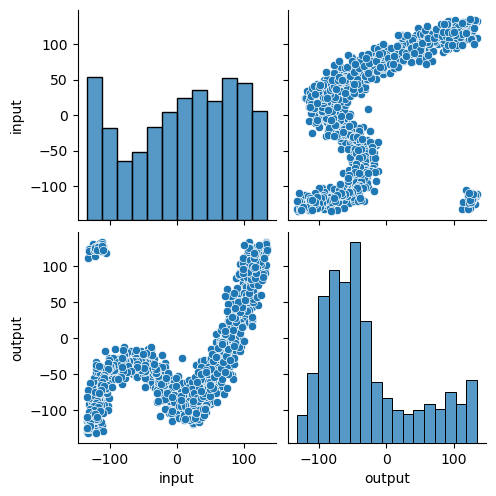

In [31]:
sns.pairplot(df)

# Data Preparation

## a. Identify the Target Variable and Splitting the Data into Train and Test

In [33]:
import sklearn

In [34]:
# Identifying the inputs (X) and output (y)

y = df['output']
X = df[['input']]

In [35]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=0)

X_train.head()

input
255   55.475282
506   80.751526
698  -23.995420
435  100.633331
144  -49.852393

In [36]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(818, 1) (818,)
(273, 1) (273,)


## b. Scaling the Numerical Features

In [38]:
X_train.head()

input
255   55.475282
506   80.751526
698  -23.995420
435  100.633331
144  -49.852393

In [52]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)
print(X_train_transformed.shape)

pd.DataFrame(X_train_transformed,columns=X_train.columns).describe()

(818, 1)


input
count  8.180000e+02
mean  -2.171585e-18
std    1.000612e+00
min   -1.826882e+00
25%   -7.492600e-01
50%    1.178856e-01
75%    8.769699e-01
max    1.619762e+00

In [54]:
print("Number of Numerical Features:", scaler.n_features_in_)
print("Mean of each column:", scaler.mean_)
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 1
Mean of each column: [7.55089622]
Std of each column: [78.00926697]


## c. Preparing Test Data

In [46]:
X_test.head()

input
27  -122.366669
650   -1.374273
484  124.641014
803 -117.077690
947   29.091458

In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 27 to 978
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   273 non-null    float64
dtypes: float64(1)
memory usage: 4.3 KB


In [56]:
#Rescaling test data

X_test_transformed = pd.DataFrame(scaler.transform(X_test), 
                                   columns = X_test.columns, 
                                   index = X_test.index)

X_test_rescaled.head()

input
27  -1.665412
650 -0.114412
484  1.500977
803 -1.597613
947  0.276128

# Linear Regression

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

In [58]:
y_test_pred = regressor.predict(X_test_transformed)

In [59]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df.head()

Actual  Predicted
27   -86.000000 -82.308513
650 -104.595355 -31.812261
484  106.879706  20.780298
803  -38.589729 -80.101154
947 -104.943052 -19.097369

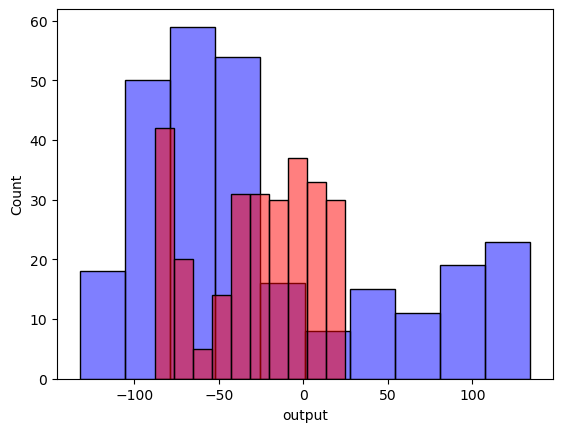

In [60]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [88]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  23.91786973807908
Mean Squared Error:  1503.468349218932
Root Mean Squared Error:  38.77458380458689


In [91]:
Linear_Regression_Mean_Absolute_Error=metrics.mean_absolute_error(y_test, y_test_pred)
Linear_Regression_Mean_Absolute_Error

23.91786973807908

# KNN Regression

In [98]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor()
regressor.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [99]:
y_test_pred = regressor.predict(X_test_transformed)

In [100]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df.head()

Actual  Predicted
27   -86.000000  27.410071
650 -104.595355 -91.956543
484  106.879706  85.346733
803  -38.589729   9.983575
947 -104.943052 -85.591085

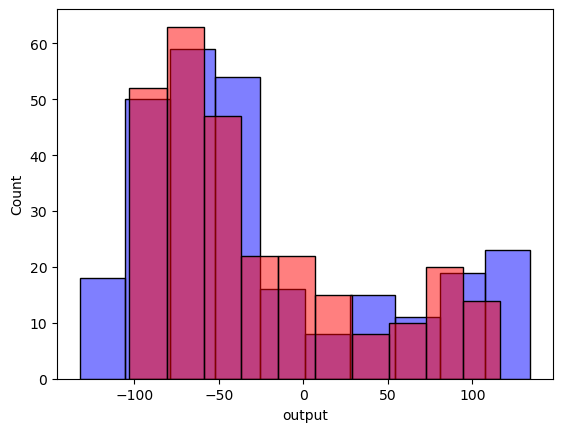

In [101]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [102]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  27.1379017085267
Mean Squared Error:  1782.329035176311
Root Mean Squared Error:  42.21763891048753


In [103]:
KNN_Regression_Mean_Absolute_Error=metrics.mean_absolute_error(y_test, y_test_pred)
KNN_Regression_Mean_Absolute_Error

27.1379017085267

# Decision Tree Regression

In [111]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X_train_transformed, y_train)

DecisionTreeRegressor()

In [112]:
y_test_pred = regressor.predict(X_test_transformed)

In [113]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df.head()

Actual  Predicted
27   -86.000000 -89.000000
650 -104.595355 -76.000000
484  106.879706  90.472122
803  -38.589729 -75.000000
947 -104.943052 -82.796934

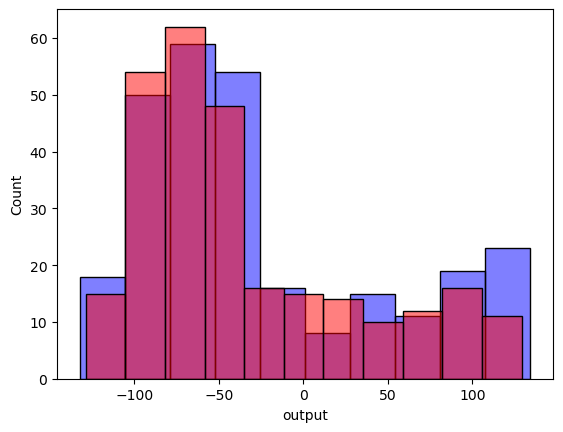

In [114]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [115]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  29.701590032737936
Mean Squared Error:  2355.635232375678
Root Mean Squared Error:  48.53488675556664


In [116]:
DT_Regression_Mean_Absolute_Error=metrics.mean_absolute_error(y_test, y_test_pred)
DT_Regression_Mean_Absolute_Error

29.701590032737936

# Random Forest Regression

In [118]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transformed, y_train)

RandomForestRegressor()

In [119]:
y_test_pred = regressor.predict(X_test_transformed)

In [120]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

df.head()

Actual  Predicted
27   -86.000000 -24.236035
650 -104.595355 -85.460079
484  106.879706  94.362742
803  -38.589729 -33.825650
947 -104.943052 -81.577605

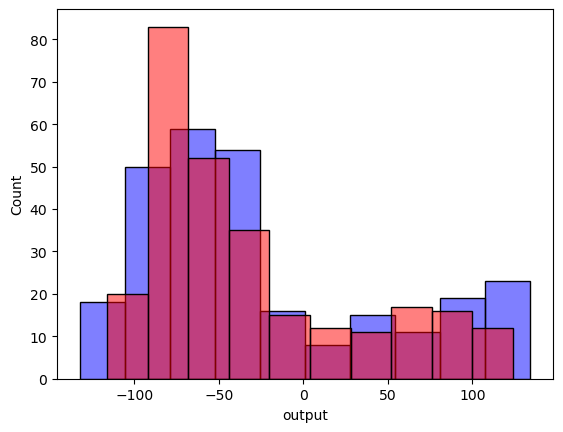

In [121]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [122]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  27.079547448669803
Mean Squared Error:  1855.6343563969197
Root Mean Squared Error:  43.07707460351642


In [123]:
Random_forest_Regression_Mean_Absolute_Error=metrics.mean_absolute_error(y_test, y_test_pred)
Random_forest_Regression_Mean_Absolute_Error

27.079547448669803

# Gradient Boosting Regression 

In [125]:
from sklearn.ensemble import GradientBoostingRegressor
reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_train_transformed, y_train)

GradientBoostingRegressor(random_state=0)

In [126]:
y_test_pred = reg.predict(X_test_transformed)

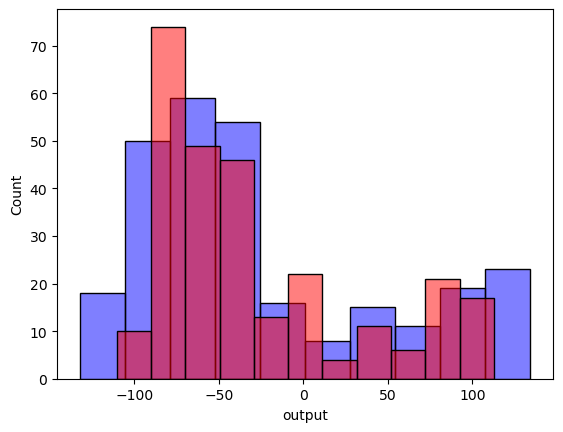

In [127]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [128]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [130]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  23.91786973807908
Mean Squared Error:  1503.468349218932
Root Mean Squared Error:  38.77458380458689


In [131]:
GBDT_Regression_Mean_Absolute_Error=metrics.mean_absolute_error(y_test, y_test_pred)
GBDT_Regression_Mean_Absolute_Error

23.91786973807908

# ADA Boost Regression

In [132]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0)
ada.fit(X_train_transformed, y_train)

AdaBoostRegressor(random_state=0)

In [133]:
y_test_pred = ada.predict(X_test_transformed)

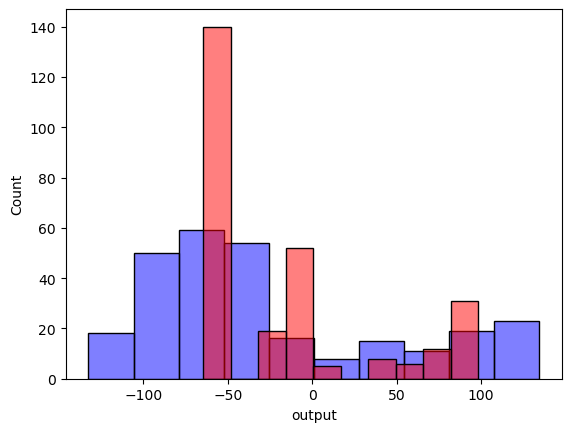

In [134]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

In [135]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

In [136]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  31.24254478721927
Mean Squared Error:  1973.0700762185238
Root Mean Squared Error:  44.41925344058051


In [137]:
ADA_boost_Regression_Mean_Absolute_Error=metrics.mean_absolute_error(y_test, y_test_pred)
ADA_boost_Regression_Mean_Absolute_Error

31.24254478721927

# Observations

In [145]:
Results = pd.DataFrame({"Algorithm": ["Linear Regression", "KNN Regression","Decision Tree Regression","Random Forest Regression",
                                      "Gradient Boosting Regression ","ADA Boost Regression"],
                                 
           "Error": [Linear_Regression_Mean_Absolute_Error,KNN_Regression_Mean_Absolute_Error, DT_Regression_Mean_Absolute_Error, 
                                   Random_forest_Regression_Mean_Absolute_Error,GBDT_Regression_Mean_Absolute_Error,ADA_boost_Regression_Mean_Absolute_Error]})
Results

Algorithm      Error
0              Linear Regression  23.917870
1                 KNN Regression  27.137902
2       Decision Tree Regression  29.701590
3       Random Forest Regression  27.079547
4  Gradient Boosting Regression   23.917870
5           ADA Boost Regression  31.242545

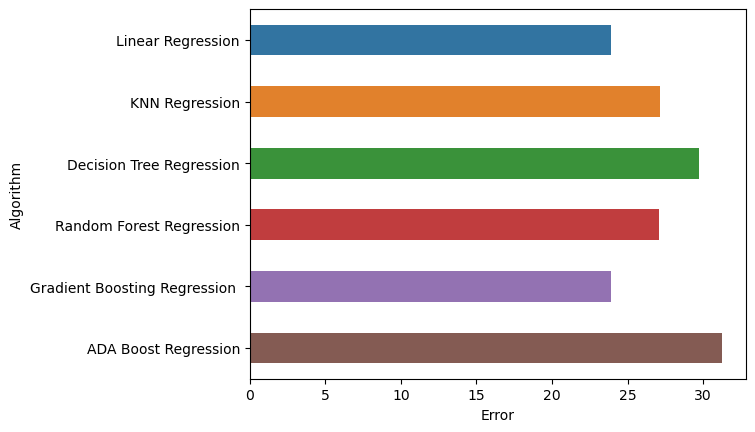

In [146]:
sns.barplot(y=Results.Algorithm,x=Results.Error,width=0.5);

**Evidently, Least Mean Absolute error was obtained on applying Gradient Boosting Regression and Linear Regression algorithms.Thus, these models are better in comparison with others for the given data.**